# Eksploracja danych / Exploratory Data Analysis

In [1]:
## python=3.9.13
## pandas, numpy, matplotlib, scikit-learn, jupyter, xlrd






In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
path = os.getcwd()+'\\dane.xls'
dataframe = pandas.read_excel(path, header = 9, usecols='K:AM,AT:BF')

In [4]:
dataframe.head()

,Nr źródła,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,Twardość Brinella [HB],Twardość Rockwella [HRC],Twardość Rockwella [HRA],Twardość Rockwella [HRB],Twardość Vickersa [HV],Udarność Charpy [J],Temperatura pomiaru udarności [˚C],Udział austenitu %,Martensite volume fraction Xα',Retained austenite volume fraction XγR
0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,NaN,NaN
1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN
2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN
3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN
4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN,NaN


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Nr źródła                                 1505 non-null   object 
 1   C [%]                                     1441 non-null   float64
 2   Si [%]                                    1441 non-null   float64
 3   S [%]                                     1377 non-null   float64
 4   P [%]                                     1362 non-null   float64
 5   Mg [%]                                    1278 non-null   float64
 6   Mn [%]                                    1402 non-null   float64
 7   Ni [%]                                    1261 non-null   float64
 8   Cu [%]                                    1225 non-null   float64
 9   Mo [%]                                    1062 non-null   float64
 10  Cr [%]                              

In [6]:
colnames = list(dataframe.columns)
display(colnames)

['Nr źródła',
 'C [%]',
 'Si [%]',
 'S [%]',
 'P [%]',
 'Mg [%]',
 'Mn [%]',
 'Ni [%]',
 'Cu [%]',
 'Mo [%]',
 'Cr [%]',
 'Al [%]',
 'Sn [%]',
 'B [%]',
 'V [%]',
 'Wydzielenia grafitu [mm-2]',
 'Udział wydzieleń grafitu [%]',
 'Średnica sferoidów [μm]',
 'Wielkość sferoidów',
 'Nodularity [%]',
 'Udział perlitu [%]',
 'Udział ferrytu [%]',
 'Rm [MPa] (as cast)',
 'A5 [%]     (as cast)',
 'Minimalna grubość ścianki [mm]',
 'Temperatura austenityzacji [˚C]',
 'Czas austenityzacji [min.]',
 'Temperatura przemiany izotermicznej [˚C]',
 'Czas przemiany izotermicznej [min.]',
 'Rm [MPa]',
 'R0,2 [MPa]',
 'A5 [%]',
 'Twardość Brinella [HB]',
 'Twardość Rockwella [HRC]',
 'Twardość Rockwella [HRA]',
 'Twardość Rockwella [HRB]',
 'Twardość Vickersa [HV]',
 'Udarność Charpy [J]',
 'Temperatura pomiaru udarności [˚C]',
 'Udział austenitu %',
 "Martensite volume fraction Xα'",
 'Retained austenite volume fraction XγR ']

In [7]:
pl_eng_dict = {'Nr źródła': 'Id',
 'Wydzielenia grafitu [mm-2]': 'Graphite emission [mm-2]',
 'Udział wydzieleń grafitu [%]': 'Graphite emission share [%]',
 'Średnica sferoidów [μm]': "Spheroid diameter [μm]",
 'Wielkość sferoidów': 'Spheroid size',
 'Udział perlitu [%]': 'Perlite share [%]',
 'Udział ferrytu [%]': 'Ferrite share [%]',
 'Minimalna grubość ścianki [mm]': 'Min wall thickness [mm]',
 'Temperatura austenityzacji [˚C]': 'Austenitization temp [C]',
 'Czas austenityzacji [min.]': 'Austenitization time [min.]',
 'Temperatura przemiany izotermicznej [˚C]': 'Isothermal process temp [C]',
 'Czas przemiany izotermicznej [min.]': 'Isothermal process time [min.]',
 'Twardość Brinella [HB]': 'HB',
 'Twardość Rockwella [HRC]': 'HRC',
 'Twardość Rockwella [HRA]': 'HRA',
 'Twardość Rockwella [HRB]': 'HRB',
 'Twardość Vickersa [HV]': 'HV',
 'Udarność Charpy [J]': 'Charpy impact strength [J]',
 'Temperatura pomiaru udarności [˚C]': 'Impact test temp [C]',
 'Udział austenitu %': 'Austenite share [%]',
 "Martensite volume fraction Xα'": 'Martensite volume',
 'Retained austenite volume fraction XγR ': 'Retained austenite volume'}

In [8]:
dataframe.rename(columns=pl_eng_dict, inplace=True)
dataframe.head()

,Id,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,HB,HRC,HRA,HRB,HV,Charpy impact strength [J],Impact test temp [C],Austenite share [%],Martensite volume,Retained austenite volume
0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,NaN,NaN
1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN
2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN
3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN
4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN,NaN


## Zmienne objaśniające / Independent variables

In [9]:
#data = dataframe.values
#X, y = data[:,:29], data[:,29:]

df_X, df_y = dataframe.iloc[:, 0:29].copy(), dataframe.iloc[:, 29:].copy()

In [10]:
df_X.head()

,Id,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,Nodularity [%],Perlite share [%],Ferrite share [%],Rm [MPa] (as cast),A5 [%] (as cast),Min wall thickness [mm],Austenitization temp [C],Austenitization time [min.],Isothermal process temp [C],Isothermal process time [min.]
0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,400.0,120.0
1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,385.0,120.0
2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,371.0,120.0
3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,357.0,120.0
4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,343.0,120.0


In [11]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1505 non-null   object 
 1   C [%]                           1441 non-null   float64
 2   Si [%]                          1441 non-null   float64
 3   S [%]                           1377 non-null   float64
 4   P [%]                           1362 non-null   float64
 5   Mg [%]                          1278 non-null   float64
 6   Mn [%]                          1402 non-null   float64
 7   Ni [%]                          1261 non-null   float64
 8   Cu [%]                          1225 non-null   float64
 9   Mo [%]                          1062 non-null   float64
 10  Cr [%]                          475 non-null    float64
 11  Al [%]                          413 non-null    float64
 12  Sn [%]                          41

### Supplier info

In [12]:
supplier_count = df_X.groupby(['Id']).size().reset_index(name='counts')
display(supplier_count)

,Id,counts
0,1,12
1,2,15
2,3,15
3,4,48
4,5,4
...,...,...
169,200,1
170,106/103,1
171,52/80,5
172,55/77,11


In [13]:
supplier_count.describe()

,counts
count,174.000000
mean,8.649425
std,14.680335
min,1.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,108.000000


c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


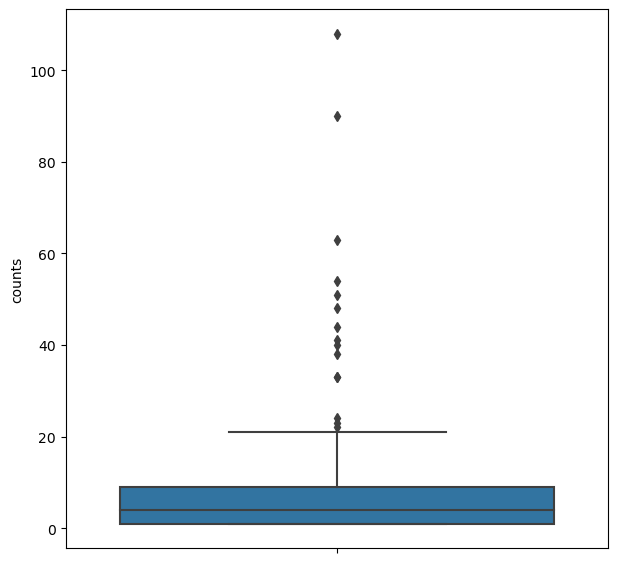

In [14]:
#plt.pyplot.boxplot(supplier_count['counts'])
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="counts", data=supplier_count)
plt.show()


### Analiza składu chemicznego / Chemical composition analysis

In [15]:
df_X.iloc[:, 1:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C [%]   1441 non-null   float64
 1   Si [%]  1441 non-null   float64
 2   S [%]   1377 non-null   float64
 3   P [%]   1362 non-null   float64
 4   Mg [%]  1278 non-null   float64
 5   Mn [%]  1402 non-null   float64
 6   Ni [%]  1261 non-null   float64
 7   Cu [%]  1225 non-null   float64
 8   Mo [%]  1062 non-null   float64
 9   Cr [%]  475 non-null    float64
 10  Al [%]  413 non-null    float64
 11  Sn [%]  410 non-null    float64
 12  B [%]   401 non-null    float64
 13  V [%]   405 non-null    float64
dtypes: float64(14)
memory usage: 165.1 KB


In [16]:
df_X.iloc[:, 1:15].describe()

,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],Cr [%],Al [%],Sn [%],B [%],V [%]
count,1441.000000,1441.000000,1377.000000,1362.000000,1278.000000,1402.000000,1261.000000,1225.000000,1062.000000,475.000000,413.000000,410.000000,401.000000,405.000000
mean,3.562797,2.577160,0.012508,0.033311,0.052736,0.260925,0.743539,0.511967,0.141892,0.029718,0.026760,0.001519,0.000329,0.001106
std,0.147499,0.283237,0.012952,0.041796,0.079586,0.142025,0.711589,0.369622,0.139755,0.068105,0.340615,0.011960,0.006021,0.011142
min,3.000000,1.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.480000,2.450000,0.007000,0.020000,0.037000,0.160000,0.015000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.560000,2.550000,0.010000,0.027000,0.045000,0.250000,0.520000,0.540000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.650000,2.670000,0.014000,0.039000,0.055000,0.310000,1.480000,0.800000,0.240000,0.032000,0.000000,0.000000,0.000000,0.000000
max,3.970000,3.580000,0.090000,0.340000,0.750000,1.230000,5.000000,1.600000,0.630000,0.300000,4.880000,0.130000,0.120000,0.180000


c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


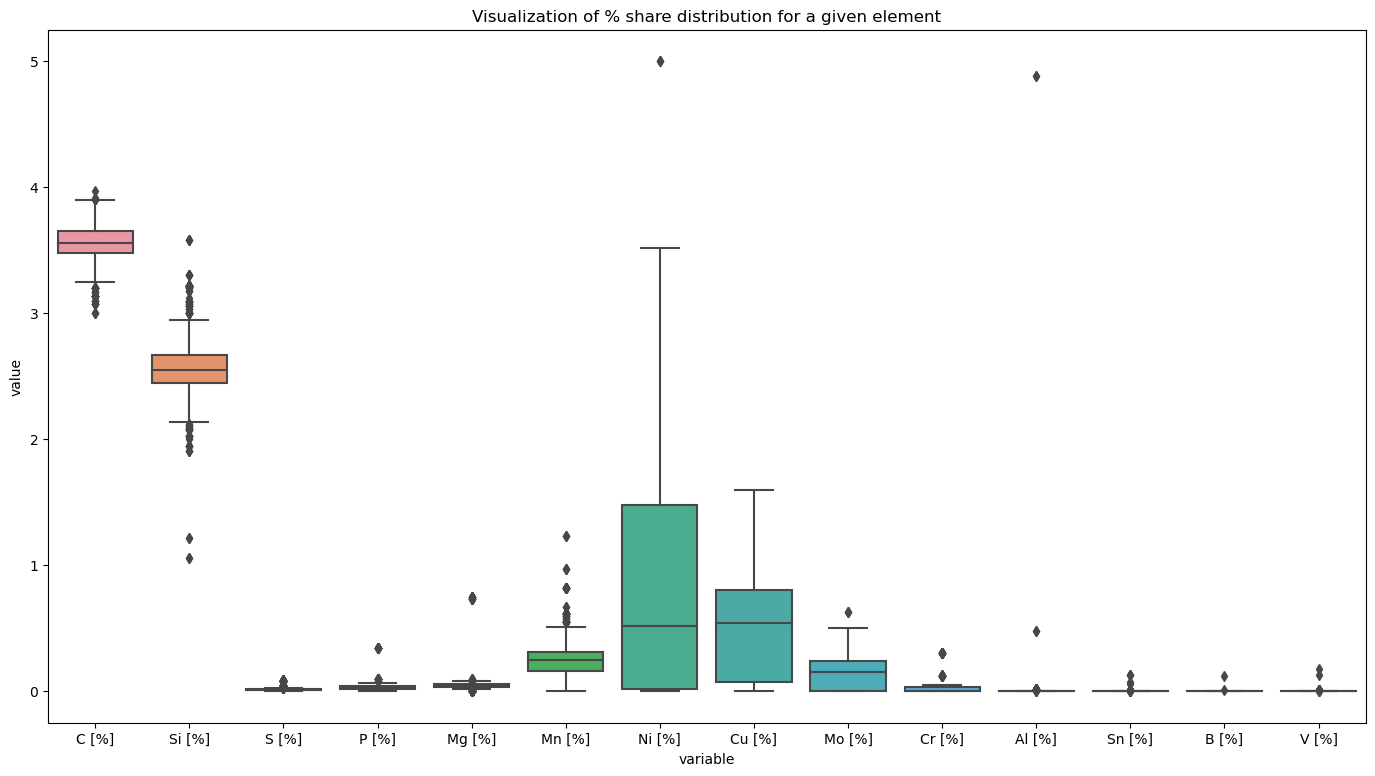

In [17]:
plt.figure(figsize=(17,9))
plt.title('Visualization of % share distribution for a given element')
ax = sns.boxplot(x="variable", y="value",data=pandas.melt(df_X.iloc[:, 1:15]))

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


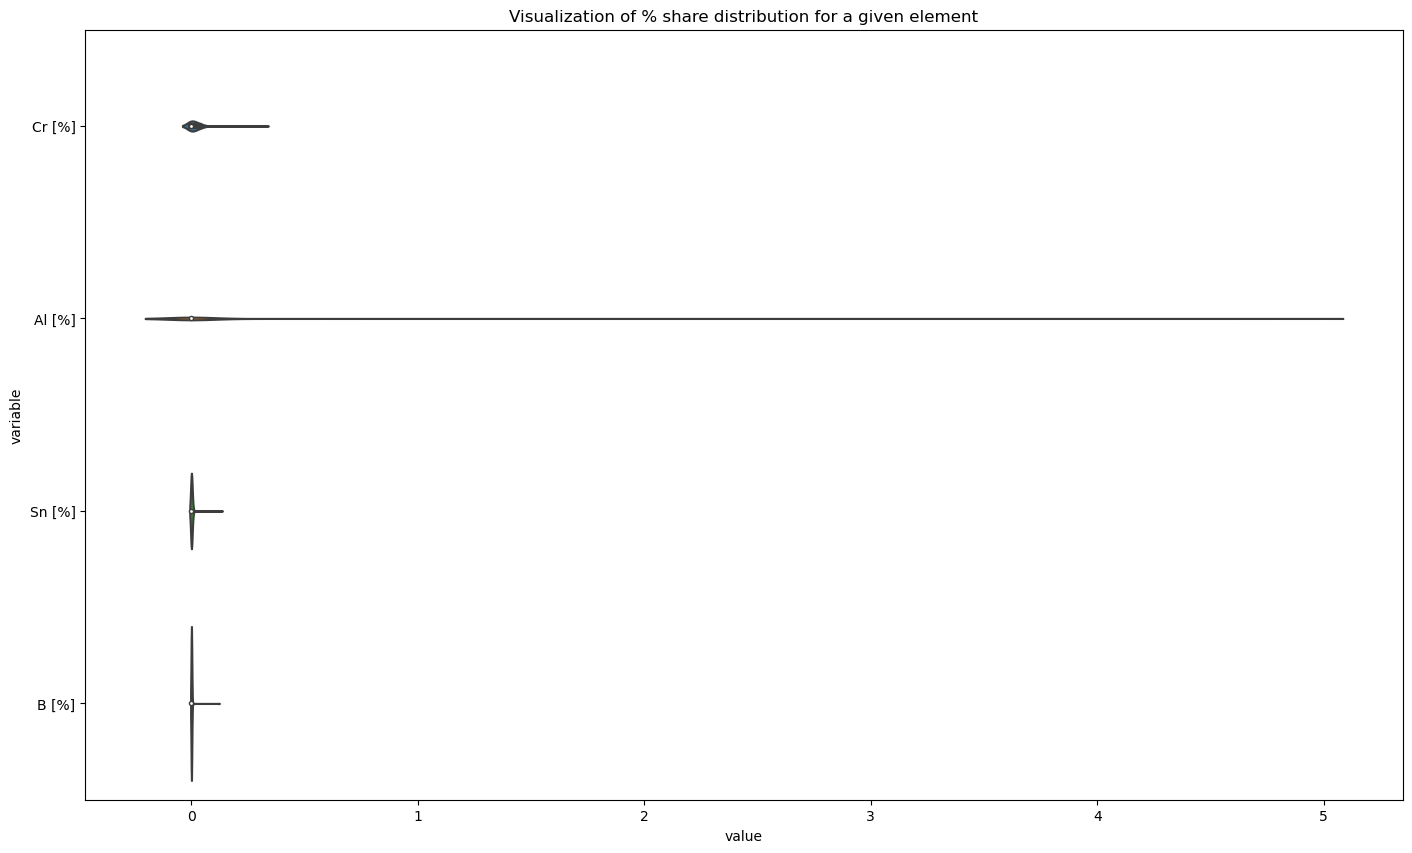

In [18]:
plt.figure(figsize=(17,10))
plt.title('Visualization of % share distribution for a given element')
ax = sns.violinplot(y="variable", x="value",data=pandas.melt(df_X.iloc[:, 10:14]))

### Other independent variables

In [19]:
df_X.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Graphite emission [mm-2]        532 non-null    float64
 1   Graphite emission share [%]     137 non-null    float64
 2   Spheroid diameter [μm]          180 non-null    float64
 3   Spheroid size                   39 non-null     object 
 4   Nodularity [%]                  166 non-null    float64
 5   Perlite share [%]               175 non-null    float64
 6   Ferrite share [%]               196 non-null    float64
 7   Rm [MPa] (as cast)              204 non-null    float64
 8   A5 [%]     (as cast)            172 non-null    float64
 9   Min wall thickness [mm]         558 non-null    float64
 10  Austenitization temp [C]        1416 non-null   float64
 11  Austenitization time [min.]     1389 non-null   float64
 12  Isothermal process temp [C]     14

In [20]:
df_X.iloc[:, 15:].describe()

,Graphite emission [mm-2],Graphite emission share [%],Spheroid diameter [μm],Nodularity [%],Perlite share [%],Ferrite share [%],Rm [MPa] (as cast),A5 [%] (as cast),Min wall thickness [mm],Austenitization temp [C],Austenitization time [min.],Isothermal process temp [C],Isothermal process time [min.]
count,532.000000,137.000000,180.000000,166.000000,175.000000,196.000000,204.000000,172.000000,558.000000,1416.000000,1389.000000,1419.000000,1412.000000
mean,191.697556,10.097591,27.518389,89.769277,77.189143,22.185204,612.806569,7.910523,26.160932,898.408192,96.696184,339.739253,108.859065
std,232.149775,1.476727,11.034553,8.577707,18.421896,14.116556,124.347364,5.376948,19.614758,27.062629,39.805360,42.807269,71.936337
min,37.000000,7.600000,12.000000,60.000000,11.000000,9.000000,370.000000,2.810000,2.000000,780.000000,1.000000,200.000000,0.000000
25%,100.000000,8.800000,23.000000,82.625000,77.700000,15.000000,507.000000,4.000000,12.500000,900.000000,60.000000,300.000000,60.000000
50%,150.000000,10.500000,23.000000,92.000000,82.700000,17.300000,576.050000,6.700000,17.000000,900.000000,90.000000,350.000000,120.000000
75%,215.000000,10.500000,32.582500,95.200000,85.000000,24.600000,735.000000,12.100000,25.400000,900.000000,120.000000,370.000000,120.000000
max,2170.000000,13.000000,70.000000,100.000000,100.000000,88.000000,890.000000,27.700000,75.000000,1050.000000,300.000000,454.000000,480.000000


In [21]:
print(df_X['Spheroid size'].unique())

[nan 6 5 4 '6 i 7']


c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


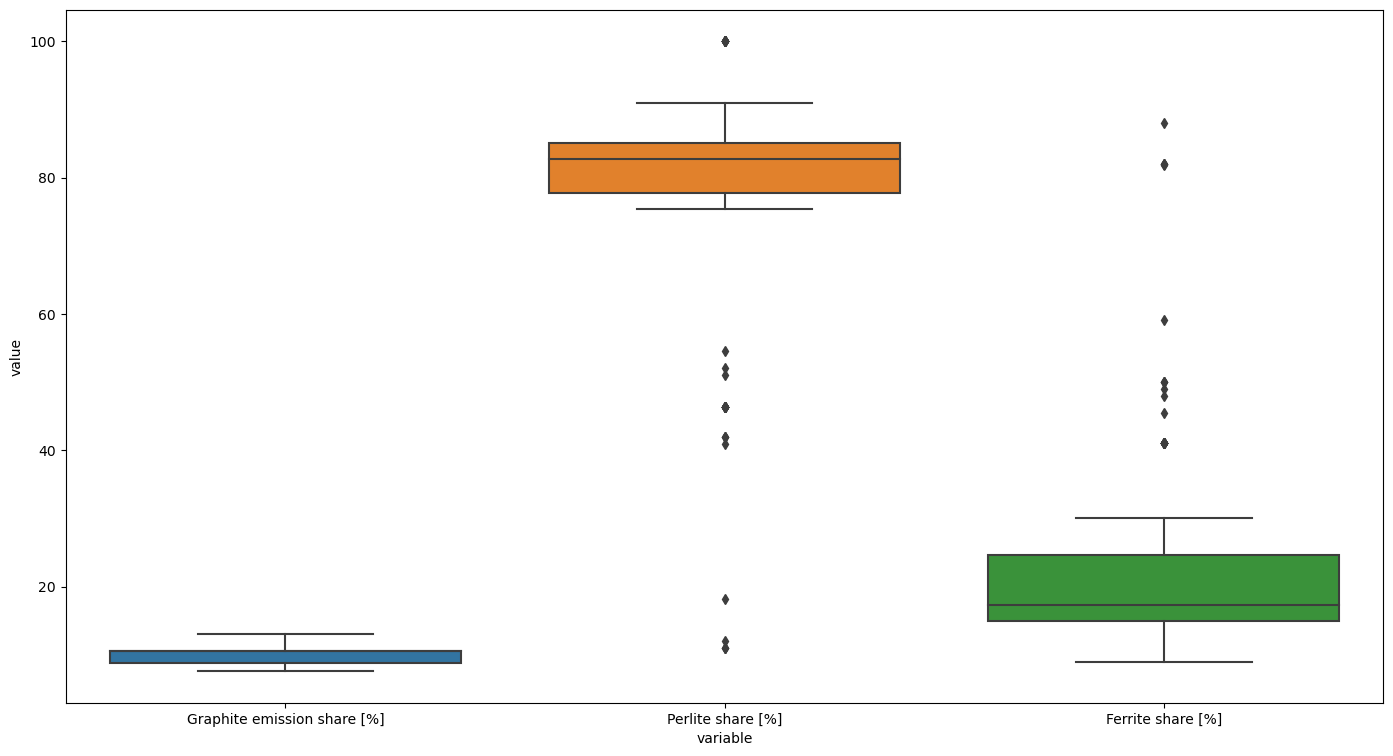

In [22]:
plt.figure(figsize=(17,9))
ax = sns.boxplot(x="variable", y="value",
                 data=pandas.melt(frame=df_X, value_vars=['Graphite emission share [%]', 'Perlite share [%]', 'Ferrite share [%]']))

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


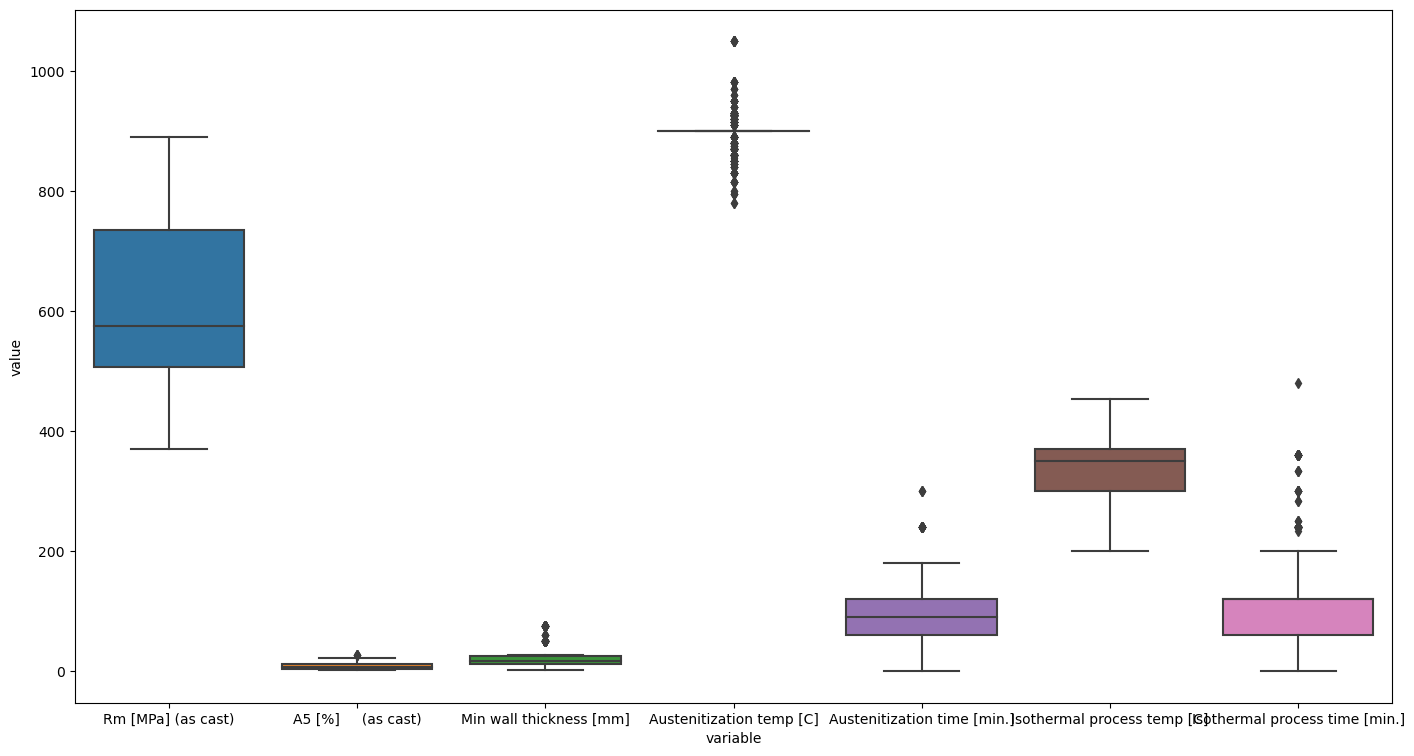

In [23]:
plt.figure(figsize=(17,9))
ax = sns.boxplot(x="variable", y="value",data=pandas.melt(df_X.iloc[:, 22:]))

## Zmienne objaśniane / Target variables

In [24]:
df_y.head()

,Rm [MPa],"R0,2 [MPa]",A5 [%],HB,HRC,HRA,HRB,HV,Charpy impact strength [J],Impact test temp [C],Austenite share [%],Martensite volume,Retained austenite volume
0,585.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,NaN,NaN
1,701.0,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN
2,1062.0,861.0,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN
3,1105.0,946.0,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN
4,1185.0,989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN,NaN


In [25]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rm [MPa]                    1094 non-null   float64
 1   R0,2 [MPa]                  844 non-null    float64
 2   A5 [%]                      968 non-null    float64
 3   HB                          416 non-null    float64
 4   HRC                         435 non-null    float64
 5   HRA                         12 non-null     float64
 6   HRB                         0 non-null      float64
 7   HV                          188 non-null    float64
 8   Charpy impact strength [J]  338 non-null    float64
 9   Impact test temp [C]        312 non-null    float64
 10  Austenite share [%]         295 non-null    float64
 11  Martensite volume           49 non-null     float64
 12  Retained austenite volume   212 non-null    float64
dtypes: float64(13)
memory usage: 153.

In [26]:
df_y.describe()

,Rm [MPa],"R0,2 [MPa]",A5 [%],HB,HRC,HRA,HRB,HV,Charpy impact strength [J],Impact test temp [C],Austenite share [%],Martensite volume,Retained austenite volume
count,1094.000000,844.000000,968.000000,416.000000,435.000000,12.000000,0.0,188.000000,338.000000,312.000000,295.000000,49.000000,212.000000
mean,1095.299625,841.605687,6.518512,333.068510,38.264874,57.833333,NaN,334.569149,70.102574,10.600962,25.432271,12.718429,21.301274
std,247.872392,240.767604,4.190676,63.376505,5.961462,7.755741,NaN,125.010610,40.207092,39.936720,13.663103,17.226564,11.568671
min,0.000000,0.000000,0.000000,218.000000,22.800000,48.000000,NaN,0.000000,2.670000,-100.000000,0.000000,0.000000,0.000000
25%,950.250000,700.000000,3.200000,290.000000,34.000000,50.000000,NaN,305.750000,38.000000,-10.000000,14.700000,0.001000,13.000000
50%,1084.000000,828.000000,6.000000,325.500000,37.000000,58.500000,NaN,344.000000,69.500000,21.000000,27.000000,3.000000,19.160000
75%,1230.825000,953.750000,9.500000,373.250000,43.000000,64.500000,NaN,400.000000,102.000000,21.000000,34.950000,20.000000,28.000000
max,2000.000000,1630.000000,33.000000,534.000000,58.000000,67.000000,NaN,632.000000,157.000000,136.200000,83.000000,64.000000,52.000000


c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

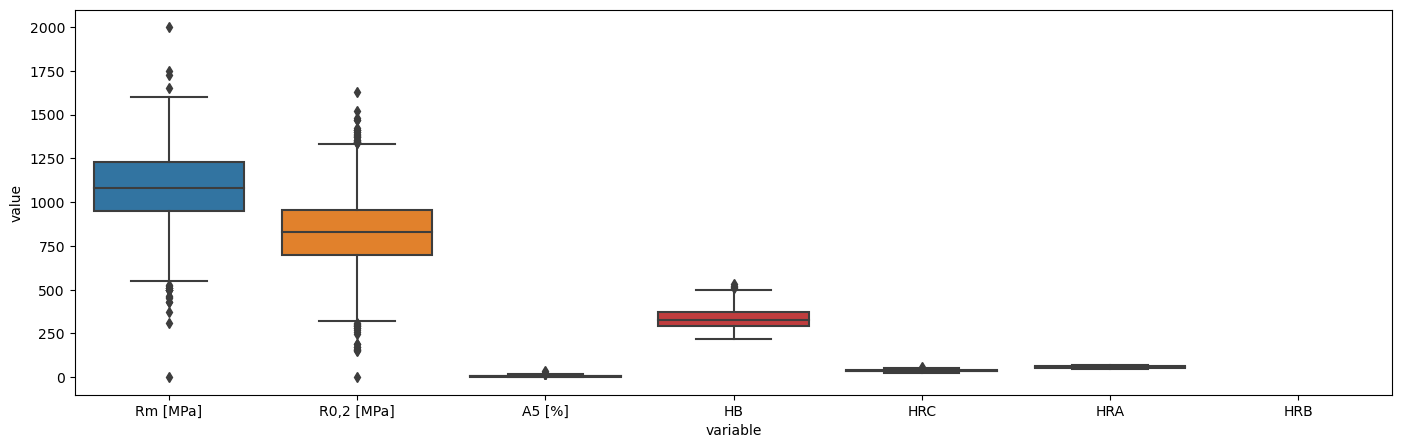

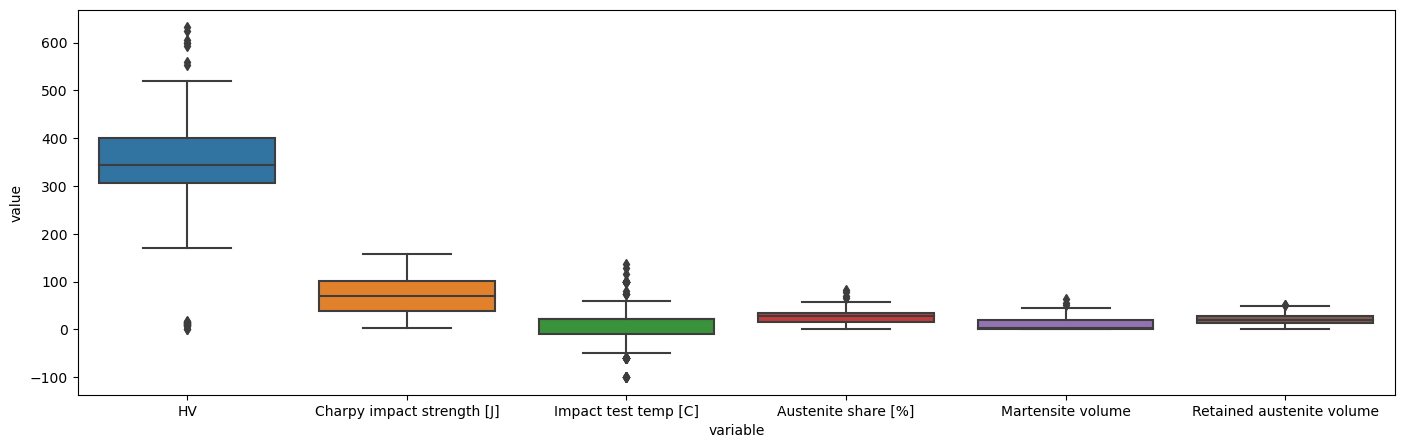

In [27]:
plt.figure(figsize=(17,5))
ax = sns.boxplot(x="variable", y="value",data=pandas.melt(df_y.iloc[:, :7]))
plt.figure(figsize=(17,5))
ax = sns.boxplot(x="variable", y="value",data=pandas.melt(df_y.iloc[:, 7:]))

In [28]:
df_y['Martensite volume'].unique()

array([     nan, 3.50e+01, 2.00e+01, 7.00e+00, 1.50e+00, 1.00e+00,
       7.00e-01, 4.50e+01, 4.00e+01, 1.00e+01, 5.00e-01, 5.20e+01,
       5.00e+00, 2.00e+00, 5.50e+01, 1.60e+01, 3.00e+00, 0.00e+00,
       6.40e+01, 1.50e+01, 6.00e+00, 1.05e+01, 1.80e+01, 2.12e+01,
       3.66e+01, 3.92e+01, 1.00e-03])

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Impact test temp [C]', ylabel='Proportion'>

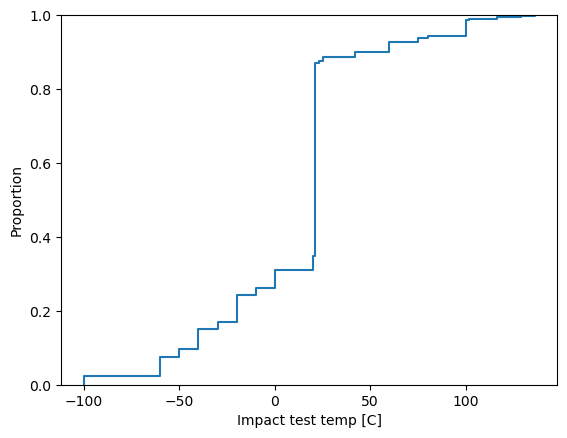

In [29]:
sns.ecdfplot(data=df_y['Impact test temp [C]'])

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Charpy impact strength [J]', ylabel='Count'>

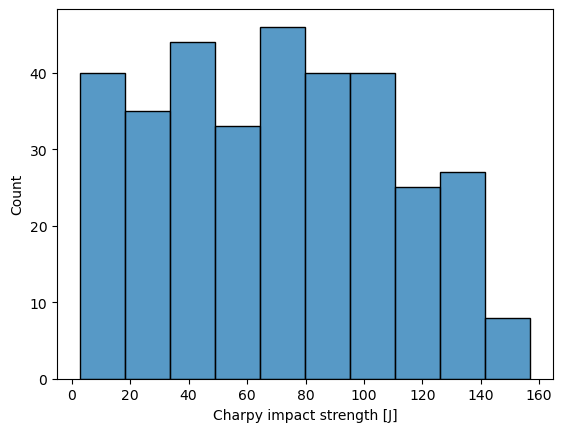

In [30]:
sns.histplot(df_y['Charpy impact strength [J]'])

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Charpy impact strength [J]', ylabel='Proportion'>

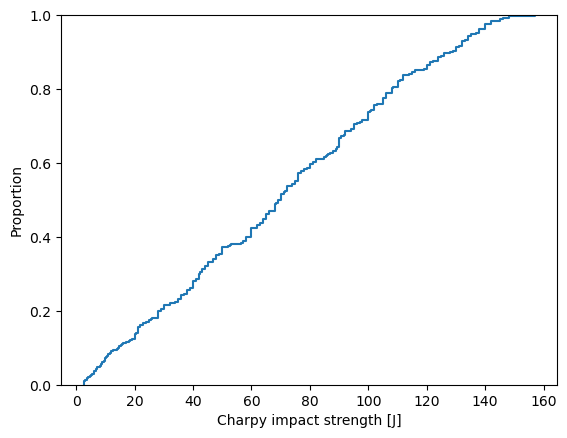

In [31]:
sns.ecdfplot(data=df_y['Charpy impact strength [J]'])

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Rm [MPa]', ylabel='Count'>

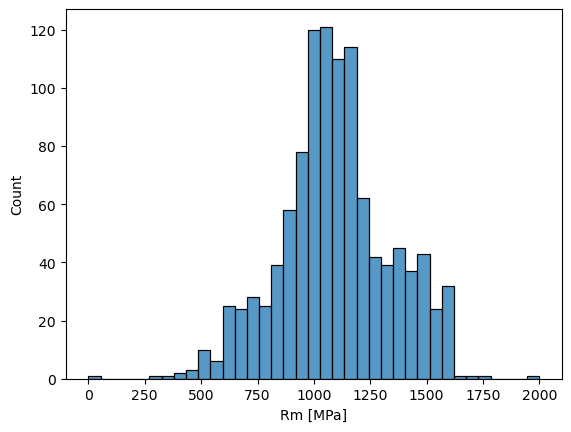

In [32]:
sns.histplot(df_y['Rm [MPa]'])

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Rm [MPa]', ylabel='Proportion'>

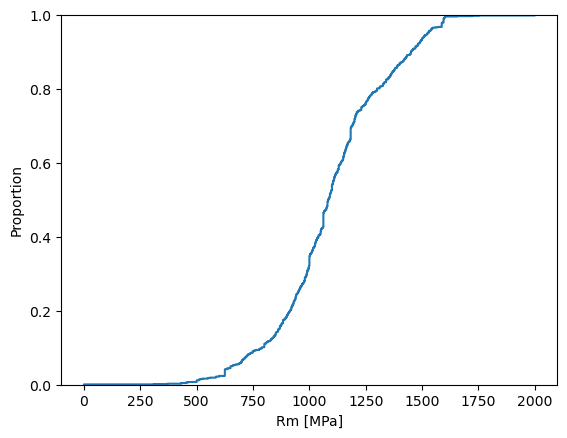

In [33]:
sns.ecdfplot(data=df_y['Rm [MPa]'])

## Looking for corelated variables

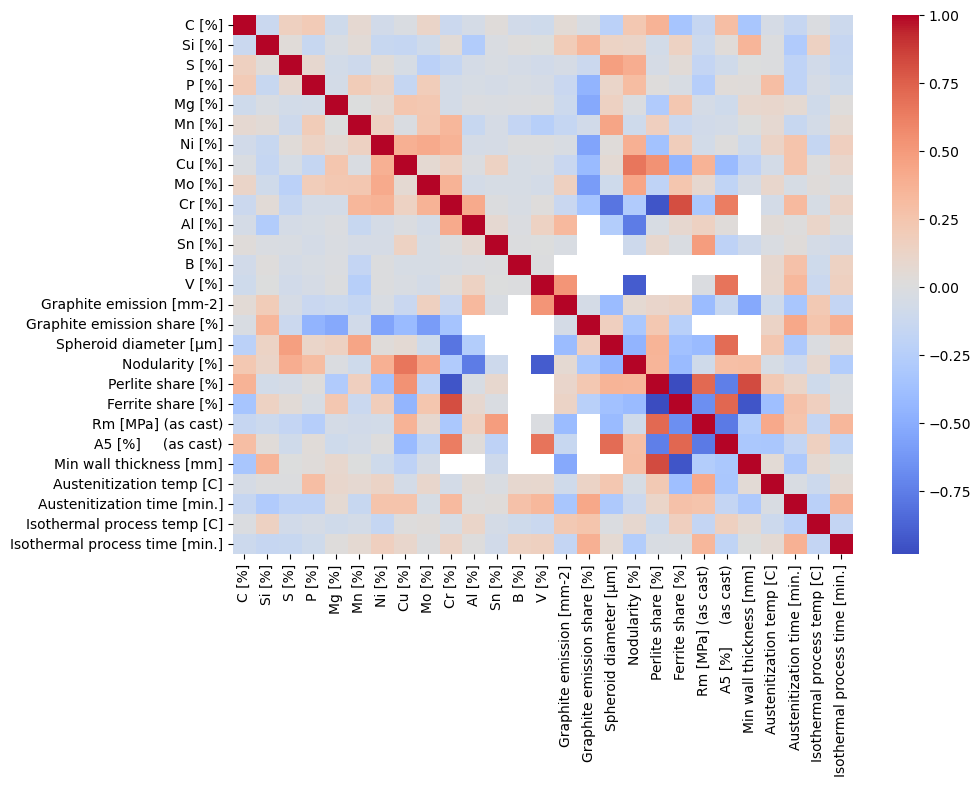

In [37]:
import re
df_X1=df_X.drop(['Id', 'Spheroid size'], axis=1)
df_y1=df_y.drop(['HRB'], axis=1)
df_for_corr = df_X1.join(df_y1)
correletions = df_X1.corr()

plt.figure(figsize=(10,7))
ax = sns.heatmap(correletions, annot=False, cmap='coolwarm')

Potential pairs (with strong correlation according to Pearson coefficient):

In [32]:
pairs = [(correletions.index[x], correletions.columns[y]) for x, y in zip(*np.where(abs(correletions.values) >= 1/2)) if x < y]
pairs

[('Mg [%]', 'Graphite emission share [%]'),
 ('Ni [%]', 'Graphite emission share [%]'),
 ('Cu [%]', 'Nodularity [%]'),
 ('Cu [%]', 'Perlite share [%]'),
 ('Mo [%]', 'Graphite emission share [%]'),
 ('Cr [%]', 'Spheroid diameter [μm]'),
 ('Cr [%]', 'Perlite share [%]'),
 ('Cr [%]', 'Ferrite share [%]'),
 ('Cr [%]', 'A5 [%]     (as cast)'),
 ('Al [%]', 'Nodularity [%]'),
 ('V [%]', 'Graphite emission [mm-2]'),
 ('V [%]', 'Nodularity [%]'),
 ('V [%]', 'A5 [%]     (as cast)'),
 ('Graphite emission [mm-2]', 'Min wall thickness [mm]'),
 ('Spheroid diameter [μm]', 'A5 [%]     (as cast)'),
 ('Perlite share [%]', 'Ferrite share [%]'),
 ('Perlite share [%]', 'Rm [MPa] (as cast)'),
 ('Perlite share [%]', 'A5 [%]     (as cast)'),
 ('Perlite share [%]', 'Min wall thickness [mm]'),
 ('Ferrite share [%]', 'Rm [MPa] (as cast)'),
 ('Ferrite share [%]', 'A5 [%]     (as cast)'),
 ('Ferrite share [%]', 'Min wall thickness [mm]'),
 ('Rm [MPa] (as cast)', 'A5 [%]     (as cast)')]

# Imputacja danych / Data imputation

In [33]:
df_X.isna().sum()

Id                                   3
C [%]                               67
Si [%]                              67
S [%]                              131
P [%]                              146
Mg [%]                             230
Mn [%]                             106
Ni [%]                             247
Cu [%]                             283
Mo [%]                             446
Cr [%]                            1033
Al [%]                            1095
Sn [%]                            1098
B [%]                             1107
V [%]                             1103
Graphite emission [mm-2]           976
Graphite emission share [%]       1371
Spheroid diameter [μm]            1328
Spheroid size                     1469
Nodularity [%]                    1342
Perlite share [%]                 1333
Ferrite share [%]                 1312
Rm [MPa] (as cast)                1304
A5 [%]     (as cast)              1336
Min wall thickness [mm]            950
Austenitization temp [C] 

Wypełnienie braków: 1. dla zmiennych o małych wartościach odchyleń standardowych imputujemy średnią (porównując oczywiście z wartością średnią), a dla pozstałych imputujemy średnią.

In [34]:
df_X.head()

,Id,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,Nodularity [%],Perlite share [%],Ferrite share [%],Rm [MPa] (as cast),A5 [%] (as cast),Min wall thickness [mm],Austenitization temp [C],Austenitization time [min.],Isothermal process temp [C],Isothermal process time [min.]
0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,400.0,120.0
1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,385.0,120.0
2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,371.0,120.0
3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,357.0,120.0
4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,343.0,120.0


In [35]:
from sklearn.impute import SimpleImputer

SI_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
SI_median = SimpleImputer(missing_values=np.nan, strategy='median')


df_X['C [%]'] = SI_mean.fit_transform(df_X['C [%]'].values.reshape(-1,1))
df_X['Si [%]'] = SI_mean.fit_transform(df_X['Si [%]'].values.reshape(-1,1))
df_X['S [%]'] = SI_median.fit_transform(df_X['S [%]'].values.reshape(-1,1))
df_X['P [%]'] = SI_median.fit_transform(df_X['P [%]'].values.reshape(-1,1))
df_X['Mg [%]'] = SI_median.fit_transform(df_X['Mg [%]'].values.reshape(-1,1))
df_X['Mn [%]'] = SI_median.fit_transform(df_X['Mn [%]'].values.reshape(-1,1))
df_X['Ni [%]'] = SI_median.fit_transform(df_X['Ni [%]'].values.reshape(-1,1))
df_X['Cu [%]'] = SI_median.fit_transform(df_X['Cu [%]'].values.reshape(-1,1))
df_X['Mo [%]'] = SI_median.fit_transform(df_X['Mo [%]'].values.reshape(-1,1))
df_X['Austenitization temp [C]'] = SI_mean.fit_transform(df_X['Austenitization temp [C]'] .values.reshape(-1,1))
df_X['Austenitization time [min.]'] = SI_median.fit_transform(df_X['Austenitization time [min.]'].values.reshape(-1,1))
df_X['Isothermal process temp [C]'] = SI_mean.fit_transform(df_X['Isothermal process temp [C]'].values.reshape(-1,1))
df_X['Isothermal process time [min.]'] = SI_median.fit_transform(df_X['Isothermal process time [min.]'].values.reshape(-1,1))

In [36]:
df_X.head()

,Id,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,Nodularity [%],Perlite share [%],Ferrite share [%],Rm [MPa] (as cast),A5 [%] (as cast),Min wall thickness [mm],Austenitization temp [C],Austenitization time [min.],Isothermal process temp [C],Isothermal process time [min.]
0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,400.0,120.0
1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,385.0,120.0
2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,371.0,120.0
3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,357.0,120.0
4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,80.0,NaN,NaN,NaN,25.4,927.0,120.0,343.0,120.0


In [37]:
df_X.isna().sum()

Id                                   3
C [%]                                0
Si [%]                               0
S [%]                                0
P [%]                                0
Mg [%]                               0
Mn [%]                               0
Ni [%]                               0
Cu [%]                               0
Mo [%]                               0
Cr [%]                            1033
Al [%]                            1095
Sn [%]                            1098
B [%]                             1107
V [%]                             1103
Graphite emission [mm-2]           976
Graphite emission share [%]       1371
Spheroid diameter [μm]            1328
Spheroid size                     1469
Nodularity [%]                    1342
Perlite share [%]                 1333
Ferrite share [%]                 1312
Rm [MPa] (as cast)                1304
A5 [%]     (as cast)              1336
Min wall thickness [mm]            950
Austenitization temp [C] 

In [38]:
# df_X=df_X.drop(['Al [%]', 'Sn [%]', 'B [%]', 'V [%]'], axis=1)
df_X=df_X.drop(['Spheroid size'], axis=1)

Zastosowanie lasu losowego w celu wypełnienia brakujących danych > 900.

In [39]:
missing_data_columns = df_X.columns[df_X.isnull().any()].tolist()
missing_data_columns = missing_data_columns[1:]
missing_data_columns

['Cr [%]',
 'Al [%]',
 'Sn [%]',
 'B [%]',
 'V [%]',
 'Graphite emission [mm-2]',
 'Graphite emission share [%]',
 'Spheroid diameter [μm]',
 'Nodularity [%]',
 'Perlite share [%]',
 'Ferrite share [%]',
 'Rm [MPa] (as cast)',
 'A5 [%]     (as cast)',
 'Min wall thickness [mm]']

In [40]:
from sklearn.ensemble import RandomForestRegressor

for column_with_nan in missing_data_columns:
    c = df_X.columns.get_loc(column_with_nan)
    data_df = df_X.iloc[:, :c+1].dropna()
    df = df_X.iloc[:, :c+1]
    df = df.drop('Id', axis=1)
    df_predykcja = df[df[column_with_nan].isnull()]
    df_predykcja = df_predykcja.drop(column_with_nan,axis = 1)
    data_df = data_df.drop('Id', axis = 1)
    X = data_df.drop(column_with_nan, axis=1)
    y = data_df[column_with_nan].values.reshape(-1, 1)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    predicted_values = model.predict(df_predykcja)
    df_X.loc[df_X[column_with_nan].isnull(), column_with_nan] = predicted_values

c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\Anaconda3\envs\odlewy\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [41]:
df_X.isna().sum()

Id                                3
C [%]                             0
Si [%]                            0
S [%]                             0
P [%]                             0
Mg [%]                            0
Mn [%]                            0
Ni [%]                            0
Cu [%]                            0
Mo [%]                            0
Cr [%]                            0
Al [%]                            0
Sn [%]                            0
B [%]                             0
V [%]                             0
Graphite emission [mm-2]          0
Graphite emission share [%]       0
Spheroid diameter [μm]            0
Nodularity [%]                    0
Perlite share [%]                 0
Ferrite share [%]                 0
Rm [MPa] (as cast)                0
A5 [%]     (as cast)              0
Min wall thickness [mm]           0
Austenitization temp [C]          0
Austenitization time [min.]       0
Isothermal process temp [C]       0
Isothermal process time [min

# Zapis danych / Saving data

In [42]:
### Rm

y=df_y.copy()
y_new = y[~y['Rm [MPa]'].isnull()]
wiersze=y_new.index 
x_new=df_X.iloc[wiersze]
x_new['y_RM'] = y_new['Rm [MPa]']

import csv

field = [
    "C [%]",
    "Si [%]",
    "S [%]",
    "P [%]",
    "Mg [%]",
    "Mn [%]",
    "Ni [%]",
    "Cu [%]",
    "Mo [%]",
    "Cr [%]",
    "Al [%]",
    "Sn [%]",
    "B [%]",
    "V [%]",
    "Graphite emission [mm-2]",
    "Graphite emission share [%]",
    "Nodularity [%]",
    "Perlite share [%]",
    "Ferrite share [%]",
    "Rm [MPa] (as cast)",
    "A5 [%]     (as cast)",
    "Min wall thickness [mm]",
    "Austenitization temp [C]",
    "Austenitization time [min.]",
    "Isothermal process temp [C]",
    "Isothermal process time [min.]",
    "y_RM"]
file_name = 'data_1.csv'
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(field)
    for index, row in x_new.iterrows():
        values = [row[column] for column in field]
        writer.writerow(values)

C:\Users\User\AppData\Local\Temp\ipykernel_3144\3430707634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new['y_RM'] = y_new['Rm [MPa]']


In [43]:
### Martensite volume

y=df_y.copy()
y_new = y[~y['Charpy impact strength [J]'].isnull()] 

wiersze=y_new.index

x_new=df_X.iloc[wiersze]
x_new['y_C'] = y_new['Charpy impact strength [J]']



field = [
    "C [%]",
    "Si [%]",
    "S [%]",
    "P [%]",
    "Mg [%]",
    "Mn [%]",
    "Ni [%]",
    "Cu [%]",
    "Mo [%]",
    "Cr [%]",
    "Al [%]",
    "Sn [%]",
    "B [%]",
    "V [%]",
    "Graphite emission [mm-2]",
    "Graphite emission share [%]",
    "Nodularity [%]",
    "Perlite share [%]",
    "Ferrite share [%]",
    "Rm [MPa] (as cast)",
    "A5 [%]     (as cast)",
    "Min wall thickness [mm]",
    "Austenitization temp [C]",
    "Austenitization time [min.]",
    "Isothermal process temp [C]",
    "Isothermal process time [min.]",
    "y_C"]
file_name = 'data_3.csv'
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(field)
    for index, row in x_new.iterrows():
        values = [row[column] for column in field]
        writer.writerow(values)


C:\Users\User\AppData\Local\Temp\ipykernel_3144\3392515740.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new['y_C'] = y_new['Charpy impact strength [J]']
